# Numerical operations with Numpy

## 3.1 **Broadcasting**
## 3.2 **Array shape manipulation**
##  3.3 **Sorting data**
##  **Summary**
## **Exercises**


In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 3.1 Broadcasting Operations

-  We just covered basic operations (add, multiple, square etc) such are element-wise but that works on arrays of same size
- **Broadcasting** comes handy when we are dealing with different shapes. This time, we'll explore a more advanced concept in numpy called broadcasting. 

- The term broadcasting describes how numpy treats arrays with different shapes during arithmetic operations. Subject to certain constraints, *the smaller array is "broadcast" across the larger array so that they have compatible shapes*. 
- Broadcasting provides a means of **vectorizing array operations** so that looping occurs in C instead of Python. It does this without making needless copies of data and usually leads to efficient algorithm implementations. There are also cases where broadcasting is a bad idea because it leads to inefficient use of memory that slows computation.
- In this little tutorial we will provide a gentle introduction to broadcasting with numerous examples ranging from simple to involved. 
- We will also go through a few examples of when to and when not to use boradcasting.



#### This example below shows how broadcasting works

<img src="figures/numpy_broadcasting.png">

### So, lets start taking baby steps...

Here an element-wise multiplication occurs since the two arrays are of same shape

In [4]:
e = np.array([1.0, 2.0, 3.0])
f = np.array([2.0, 2.0, 2.0])
e*f

array([ 2.,  4.,  6.])

##### Hint / Try it?

What would have happened if `f = np.array([2.0, 2.0])`. would it still multiply?

In [5]:
# But if it was like this

e = np.array([1.0, 2.0, 3.0])
f = 2.0
e*f

array([ 2.,  4.,  6.])

##### What happened here

This is the most simplest example on numpy broadcasting where an array and a scalar values were combined in an operation.

so it kind of *stechted in the row direction*! The scalar **f** is stretched to become an array of with the same shape as **e** so the shapes are compatible for element-by-element multiplication.

<img src="figures/broadcast_stretch.gif">

** So what are the rules then?**
- They must either be equal / same shape
OR
- One of them must be 1, like f was above

In [6]:
# Typical broadcasting in practice
g = np.array([[ 0.0, 0.0, 0.0], [10.0,10.0,10.0],[20.0,20.0,20.0],[30.0,30.0,30.0]])
g       

array([[  0.,   0.,   0.],
       [ 10.,  10.,  10.],
       [ 20.,  20.,  20.],
       [ 30.,  30.,  30.]])

In [7]:
h = np.array([1.0, 2.0, 3.0])
h

array([ 1.,  2.,  3.])

In [8]:
g + h

array([[  1.,   2.,   3.],
       [ 11.,  12.,  13.],
       [ 21.,  22.,  23.],
       [ 31.,  32.,  33.]])

### What happened above?

A 2-D (two-dimensional) array multiplied by 1-D (one-dimensional) array. It got stretched in the column direction so as to match the elements of the 2D array columns.
<img src="figures/broadcast_strectch2.gif">

Would the same be possible for different shapes? Does broadcasting magically understands and fixes our assumptions?

Let's take a look...



In [9]:
g = np.array([[ 0.0, 0.0, 0.0], [10.0,10.0,10.0],[20.0,20.0,20.0],[30.0,30.0,30.0]])
i = np.array([0.0, 1.0, 2.0, 3.0])
g+i       

ValueError: operands could not be broadcast together with shapes (4,3) (4,) 

### We had a mismatch...

<img src="figures/broadcast_strectch3.gif">

Explanation: When the trainling dimensions of the arrays are different as you saw above, then broadcasting will fail making it impossible to align the values in the rows of the first array with the elements of the second array for an **element-by-element** addition or multiplication.

### Also, is there a way to do this in one line of code

Tip: look up more into np.tile and np.arange

In [10]:
a = np.tile(np.arange(0, 40, 10), (3, 1))
a = a.T # transpose this
a

array([[ 0,  0,  0],
       [10, 10, 10],
       [20, 20, 20],
       [30, 30, 30]])

In [11]:
b = np.array([0, 1, 2])
b

array([0, 1, 2])

##### Now, we add these two

In [12]:
a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

##### So you see that broadcasting was applied magically...

Ask yourself, why couldn't we add original `a` and `b` ?

Note, original a was:
```python
array([[ 0, 10, 20, 30],
       [ 0, 10, 20, 30],
       [ 0, 10, 20, 30]])
```

In [13]:
c = np.ones((5, 6))
c

array([[ 1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.]])

##### Let's assign an array of dimension 0 to an array of dimension 1

In [14]:
c[0] = 2
c

array([[ 2.,  2.,  2.,  2.,  2.,  2.],
       [ 1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.]])

In [15]:
d = np.arange(0, 30, 10)
d

array([ 0, 10, 20])

In [16]:
d.shape

(3,)

In [17]:
d = d[:, np.newaxis] # Here we add a new axis and make it a 2D array
d.shape

(3, 1)

In [18]:
a + d

ValueError: operands could not be broadcast together with shapes (4,3) (3,1) 

#### Another example on broadcasting

Let’s construct an array of distances (in miles) between cities of Route 66: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff and Los Angeles.

In [19]:
mileposts = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
distance_array = np.abs(mileposts - mileposts[:, np.newaxis])
distance_array

array([[   0,  198,  303,  736,  871, 1175, 1475, 1544, 1913, 2448],
       [ 198,    0,  105,  538,  673,  977, 1277, 1346, 1715, 2250],
       [ 303,  105,    0,  433,  568,  872, 1172, 1241, 1610, 2145],
       [ 736,  538,  433,    0,  135,  439,  739,  808, 1177, 1712],
       [ 871,  673,  568,  135,    0,  304,  604,  673, 1042, 1577],
       [1175,  977,  872,  439,  304,    0,  300,  369,  738, 1273],
       [1475, 1277, 1172,  739,  604,  300,    0,   69,  438,  973],
       [1544, 1346, 1241,  808,  673,  369,   69,    0,  369,  904],
       [1913, 1715, 1610, 1177, 1042,  738,  438,  369,    0,  535],
       [2448, 2250, 2145, 1712, 1577, 1273,  973,  904,  535,    0]])

#### Another example

A lot of grid-based or network-based problems can also use broadcasting. For instance, if we want to compute the distance from the origin of points on a 10x10 grid, we can do

In [20]:
x, y = np.arange(5), np.arange(5)[:, np.newaxis]
distance = np.sqrt(x**2 + y**2)
distance

array([[ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ],
       [ 1.        ,  1.41421356,  2.23606798,  3.16227766,  4.12310563],
       [ 2.        ,  2.23606798,  2.82842712,  3.60555128,  4.47213595],
       [ 3.        ,  3.16227766,  3.60555128,  4.24264069,  5.        ],
       [ 4.        ,  4.12310563,  4.47213595,  5.        ,  5.65685425]])

##### Or in color... 

<function matplotlib.pyplot.colorbar>

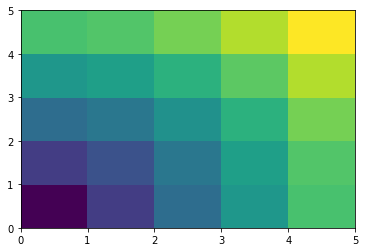

In [21]:
plt.pcolor(distance)
plt.colorbar

In [22]:
# Note : The numpy.ogrid function allows to directly create vectors
# x and y of the previous example
x, y = np.ogrid[0:5, 0:5]
x, y

(array([[0],
        [1],
        [2],
        [3],
        [4]]), array([[0, 1, 2, 3, 4]]))

In [23]:
x.shape, y.shape

((5, 1), (1, 5))

 `np.ogrid` is quite useful as soon as we have to handle computations on a grid. While on other hand, `np.mgrid`
 directly provides matrices full of indices for cases where we can't or maybe don't want to benefit from broadcasting.

In [24]:
x, y = np.mgrid[0:4, 0:4]
x

array([[0, 0, 0, 0],
       [1, 1, 1, 1],
       [2, 2, 2, 2],
       [3, 3, 3, 3]])

In [25]:
y

array([[0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3]])

#### A bit on Vector quantization or VQ

A simple way to understand bradcasting is with this real world situation. The basic operatio in VQ finds the closest point in a set of points, called $codes$ in VQ speak, to a given point, called the `observation`.

In the 2D example below, the value in an $observation$ describe the weight and height of an athlete to be classified. The $codes$ represent different classes of athletes such as dancer, runner, swimmer an so on.

Finding the closest point requires calculating the distance between `observation` and each of the `codes`.

The shortest distance provides the best match. Here in this example, `codes[0]` is the closest class indicating that the athlete is likely a basketball player.

<img src="figures/VQ.png">

In [26]:
from numpy import array, argmin, sqrt, sum
observation = array([111.0, 188.0])
codes = array([[102.0, 203.0],
               [132.0, 193.0],
                [45.0, 155.0],
                [57.0, 173.0]])

In [27]:
# This is how broadcast happens
difference = codes - observation
distance = sqrt(sum(difference**2, axis=-1))
nearest = argmin(distance)
nearest

0

The basic operation of vector quantization calculates the distance between an object to be classified, the black square, and multiple known codes, the gray circles. In the very basic case, the codes represent classes.

### A more advanced example  

`@article{scikit-learn,
 title={Scikit-learn: Machine Learning in {P}ython},
 author={Pedregosa, F. and Varoquaux, G. and Gramfort, A. and Michel, V.
         and Thirion, B. and Grisel, O. and Blondel, M. and Prettenhofer, P.
         and Weiss, R. and Dubourg, V. and Vanderplas, J. and Passos, A. and
         Cournapeau, D. and Brucher, M. and Perrot, M. and Duchesnay, E.},
 journal={Journal of Machine Learning Research},
 volume={12},
 pages={2825--2830},
 year={2011}
}`

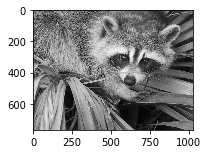

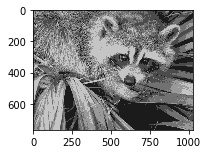

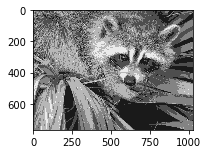

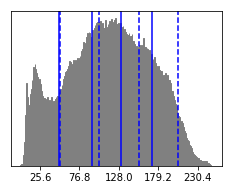

In [28]:
# A more complex example
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from sklearn import cluster


try:  # SciPy >= 0.16 have face in misc
    from scipy.misc import face
    face = face(gray=True)
except ImportError:
    face = sp.face(gray=True)

n_clusters = 5
np.random.seed(0)

X = face.reshape((-1, 1))  # We need an (n_sample, n_feature) array
k_means = cluster.KMeans(n_clusters=n_clusters, n_init=4)
k_means.fit(X)
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_

# create an array from labels and values
face_compressed = np.choose(labels, values)
face_compressed.shape = face.shape

vmin = face.min()
vmax = face.max()

# original face
plt.figure(1, figsize=(3, 2.2))
plt.imshow(face, cmap=plt.cm.gray, vmin=vmin, vmax=256)

# compressed face
plt.figure(2, figsize=(3, 2.2))
plt.imshow(face_compressed, cmap=plt.cm.gray, vmin=vmin, vmax=vmax)

# equal bins face
regular_values = np.linspace(0, 256, n_clusters + 1)
regular_labels = np.searchsorted(regular_values, face) - 1
regular_values = .5 * (regular_values[1:] + regular_values[:-1])  # mean
regular_face = np.choose(regular_labels.ravel(), regular_values, mode="clip")
regular_face.shape = face.shape
plt.figure(3, figsize=(3, 2.2))
plt.imshow(regular_face, cmap=plt.cm.gray, vmin=vmin, vmax=vmax)

# histogram
plt.figure(4, figsize=(3, 2.2))
plt.clf()
plt.axes([.01, .01, .98, .98])
plt.hist(X, bins=256, color='.5', edgecolor='.5')
plt.yticks(())
plt.xticks(regular_values)
values = np.sort(values)
for center_1, center_2 in zip(values[:-1], values[1:]):
    plt.axvline(.5 * (center_1 + center_2), color='b')

for center_1, center_2 in zip(regular_values[:-1], regular_values[1:]):
    plt.axvline(.5 * (center_1 + center_2), color='b', linestyle='--')

plt.show()

## 3.2 Array Shape Manipulation

### Flattening

In [29]:
a = np.array([[1, 2, 3], [4, 5, 6]])
a.ravel() 
"""
A 1-D array, containing the elements of the input, is returned.  A copy is
    made only if needed.
    Do help(np.ravel) to learn more
"""

'\nA 1-D array, containing the elements of the input, is returned.  A copy is\n    made only if needed.\n    Do help(np.ravel) to learn more\n'

In [30]:
a.T

array([[1, 4],
       [2, 5],
       [3, 6]])

###  Reshaping

In [31]:
a.shape

(2, 3)

In [32]:
a.reshape(-1)

array([1, 2, 3, 4, 5, 6])

In [33]:
b = a.ravel()
b

array([1, 2, 3, 4, 5, 6])

In [34]:
b = b.reshape((2, 3))
b

array([[1, 2, 3],
       [4, 5, 6]])

In [35]:
# Which is same as ...
a.reshape(2, -1)


array([[1, 2, 3],
       [4, 5, 6]])

In [36]:
# Note:  ndarray.reshape may return a view (cf help(np.reshape))), or copy
b[0, 0] = 99
a

array([[99,  2,  3],
       [ 4,  5,  6]])

In [37]:
# Reshape also returns a copy, take a look
a = np.zeros((3, 2))
b = a.T.reshape(3 * 2)
b [0] = 9
a

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

##### Memory layout of a numpy array

- [Here's a good example of how it works](https://eli.thegreenplace.net/2015/memory-layout-of-multi-dimensional-arrays/)
- 

In [38]:
x = np.random.rand(2, 2)
x.data

In [39]:
x.__array_interface__['data']

(140329574190480, False)

In [40]:
x[0].__array_interface__['data']

(140329574190480, False)

In [41]:
x[0,:].__array_interface__['data']

(140329574190480, False)

In [42]:
x[1,:].__array_interface__['data']

(140329574190496, False)

In [43]:
x[0,0].__array_interface__['data']

(140329652477104, False)

## 3.3 Sorting Data

*Function*

`sort (arr, axis=-1, kind='quick', order=None)`

*Method*

`arr.sort (axis=-1, kind='quick', order=None)`

In [46]:
# Sorting along an axis. see what happens?
a = np.array([[1, 4, 3], [3, 1, 3]])
b = np.sort(a, axis=1)
print(b)

[[1 3 4]
 [1 3 3]]


In [47]:
# In-place sort
a.sort(axis=1)
print(a)

[[1 3 4]
 [1 3 3]]


In [49]:
# Sorting with fancy indexing
a = np.array([5, 4, 6, 1])
x = np.argsort(a)
x

array([3, 1, 0, 2])

In [50]:
# Finding minima and maxima
b = np.array([3,5,2,6])
b_max = np.argmax(b)
b_min = np.argmin(b)
print(b_max)
print(b_min)

3
2


## Some Exercises  😅


#### 1. Array manipulations

Create this 2D array (without typing manually)

`
[[1,  7, 12],
 [2,  8, 13],
 [3,  9, 14],
 [4, 10, 15],
 [5, 11, 16]]
`

#### 2.  

#### Fun Exercises: Challenge questions

1. Try in-place, out_of_place sorting
2. Create arrays with different dtypes and sort them.
3. Use all or array_equal to see what it returns
4. Use np.random.shuffle to create a more sortable input
5. Combine ravel, sort and reshape in one
6. Look at the `axis` keyword for `sort` and rewrite the previous exercise

In [64]:
a = np.arange(25).reshape(5, 5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [65]:
help(np.sum)

Help on function sum in module numpy.core.fromnumeric:

sum(a, axis=None, dtype=None, out=None, keepdims=<class 'numpy._globals._NoValue'>)
    Sum of array elements over a given axis.
    
    Parameters
    ----------
    a : array_like
        Elements to sum.
    axis : None or int or tuple of ints, optional
        Axis or axes along which a sum is performed.  The default,
        axis=None, will sum all of the elements of the input array.  If
        axis is negative it counts from the last to the first axis.
    
        .. versionadded:: 1.7.0
    
        If axis is a tuple of ints, a sum is performed on all of the axes
        specified in the tuple instead of a single axis or all the axes as
        before.
    dtype : dtype, optional
        The type of the returned array and of the accumulator in which the
        elements are summed.  The dtype of `a` is used by default unless `a`
        has an integer dtype of less precision than the default platform
        integer.  I

In [67]:
help(np.matrix.sum)

Help on function sum in module numpy.matrixlib.defmatrix:

sum(self, axis=None, dtype=None, out=None)
    Returns the sum of the matrix elements, along the given axis.
    
    Refer to `numpy.sum` for full documentation.
    
    See Also
    --------
    numpy.sum
    
    Notes
    -----
    This is the same as `ndarray.sum`, except that where an `ndarray` would
    be returned, a `matrix` object is returned instead.
    
    Examples
    --------
    >>> x = np.matrix([[1, 2], [4, 3]])
    >>> x.sum()
    10
    >>> x.sum(axis=1)
    matrix([[3],
            [7]])
    >>> x.sum(axis=1, dtype='float')
    matrix([[ 3.],
            [ 7.]])
    >>> out = np.zeros((1, 2), dtype='float')
    >>> x.sum(axis=1, dtype='float', out=out)
    matrix([[ 3.],
            [ 7.]])



In [69]:
np.sum([1.0, 1.5])

2.5

In [71]:
np.sum([1.0, 0.4, 0.5, 0.6], dtype=np.int32)

1

In [72]:
np.sum([[0, 2], [0, 6]])

8

In [73]:
np.sum([[0, 2], [0, 6]], axis=0)

array([0, 8])

In [74]:
np.sum([[0, 2], [0, 6]], axis=1)

array([2, 6])